In [1]:
!pip install pint
!pip install uncertainties
!pip install scipy
!pip install numpy
!pip install sympy
!pip install pandas
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 896.8 kB/s eta 0:00:00


In [2]:
from uncertainties import ufloat
from scipy import constants
import pint
import numpy as np
import sympy as sp
import pandas as pd
import matplotlib.pyplot as plt

ureg = pint.UnitRegistry()

# Exercises

In [3]:
# 2.1
v_av_x = 6.25 * ureg.meter / ureg.second
t = 4.00 * ureg.second
print('The car travelled ', f"{(v_av_x*t).to(ureg.meter):3g}")

The car travelled   25 meter


In [4]:
# 2.3 Trip Home
v_norm = 72 * ureg.kilometer / ureg.hour
t_norm = 62 * ureg.minute
distance = v_norm * t_norm
v_peak = 49 * ureg.kilometer / ureg.hour
print('It taks ', f"{(distance/v_peak).to(ureg.hour):.2f}")

It taks  1.52 hour


In [5]:
# 2.5
d_1 = [60.0 * ureg.meter, 0 * ureg.meter]
t_1 = 28.0 * ureg.second
d_2 = [-40.0 * ureg.meter, 0 * ureg.meter]
t_2 = 36.0 * ureg.second
d_res = [x + y for x, y in zip(d_1, d_2)]
t_sum = t_1 + t_2
print('The average velocity is ', f"{d_res[0]/t_sum:.3g}")
print('The average speed is ', f"{100 * ureg.meter / t_sum:.3g}")

The average velocity is  0.312 meter / second
The average speed is  1.56 meter / second


In [6]:
# 2.7 CALC
def x(t):
  b = 2.4 * ureg.meter / ureg.second**2
  c= 0.120 * ureg.meter / ureg.second**3
  return b * t**2 - c * t**3
def x_diff_1(t):
  b = 2.4 * ureg.meter / ureg.second**2
  c= 0.120 * ureg.meter / ureg.second**3
  return 2 * b * t - 3 * c * t**2
print('(a) The average velocity of the car for the time interval t=0 to t=10.0s is ', f"{(x(10*ureg.second)-x(0*ureg.second))/(10*ureg.second):.3g}")

print('(b) The instantaneous velocity of the car at t=0s: ', f"{x_diff_1(0*ureg.second):.3g}")
print('at t=5s: ', f"{x_diff_1(5*ureg.second):.3g}", ' ; at t=10s: ', f"{x_diff_1(10*ureg.second):.3g}")

t = sp.symbols('t ')
eq = sp.Eq(2.4 * t**2 - 0.120 * t**3, 0)
solution = sp.solve(eq, t)
print('(c) ', f"{solution[1]:.3g}", 'second')

(a) The average velocity of the car for the time interval t=0 to t=10.0s is  12 meter / second
(b) The instantaneous velocity of the car at t=0s:  0 meter / second
at t=5s:  15 meter / second  ; at t=10s:  12 meter / second
(c)  20.0 second


In [7]:
# 2.9
print('(a) It is +', f"{2*2+3*(3-2):.2g}", 'm/s.')
print('(b) v = ', f"{2*2+(-3)*(3-2):.2g}", 'm/s, speed = ', f"{2*2+3*(3-2):.2g}", 'm/s.')

(a) It is + 7 m/s.
(b) v =  1 m/s, speed =  7 m/s.


In [8]:
# 2.11
print('v_a = v_a = 20/3 (m/s), v_c = 0 m/s, v_d = v_e = v_f = -40 m/s, v_g = 0 m/s.')

v_a = v_a = 20/3 (m/s), v_c = 0 m/s, v_d = v_e = v_f = -40 m/s, v_g = 0 m/s.


(a) Initial velocity:  2 cm/s.Initial position:  50 cm.Initial acceleration:  -0.125 cm/s^2.
(b) At time =  16 s
(c) After  48.5 s.
(d) At time =  45.9 s. And v of this time is  -3.74 cm/s.
x(t) = -0.0625*t**2 + 2*t + 50
v(t) = 2 - 0.125*t
a(t) = -0.125000000000000


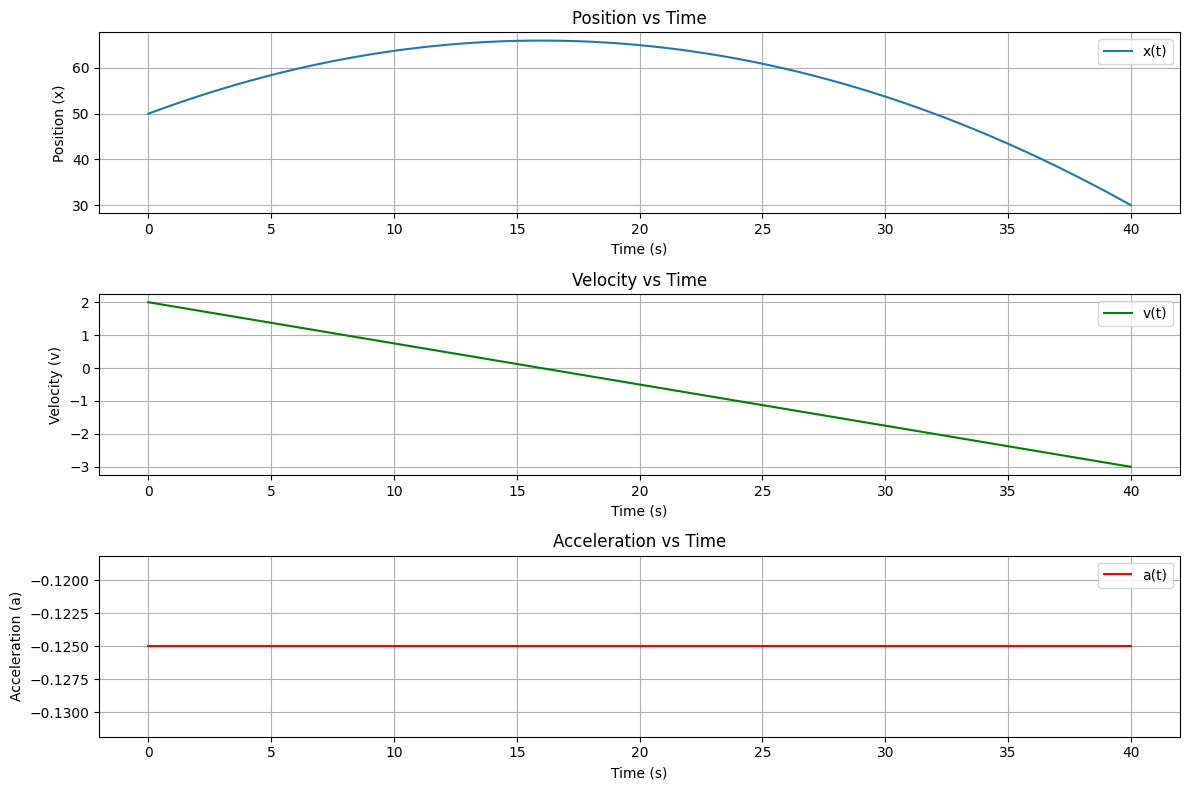

In [9]:
# 2.13
t = sp.symbols('t')
x = 50 + 2*t - 0.0625*t**2
v = sp.diff(x, t)
a = sp.diff(v, t)
print('(a) Initial velocity: ', f"{float(v.subs(t,0)):.3g}", 'cm/s.'\
      'Initial position: ', f"{float(x.subs(t,0)):.3g}", 'cm.'\
      'Initial acceleration: ', f"{float(a.subs(t,0)):.3g}", 'cm/s^2.')

eq = sp.Eq(v, 0)
sol = sp.solve(eq, t)
print('(b) At time = ', f"{float(sol[0]):.3g}", 's')

eq = sp.Eq(x, 0)
sol = sp.solve(eq, t)
print('(c) After ', f"{sol[1]:.3g}", 's.')

eq = sp.Eq(x, 10)
sol = sp.solve(eq, t)
print('(d) At time = ', f"{sol[1]:.3g}", 's. And v of this time is ', f"{float(v.subs(t,sol[1])):.3g}", 'cm/s.')

# From chatGPT
# 打印函数表达式
print(f"x(t) = {x}")
print(f"v(t) = {v}")
print(f"a(t) = {a}")

# 将符号表达式转换为可计算的函数
x_func = sp.lambdify(t, x, 'numpy')
v_func = sp.lambdify(t, v, 'numpy')
a_func = sp.lambdify(t, a, 'numpy')

# 定义时间范围
t_values = np.linspace(0, 40, 400)

# 计算函数值
x_values = x_func(t_values)
v_values = v_func(t_values)
a_value = a_func(0)  # a(t) 是常数，所以只计算一次
a_values = np.full_like(t_values, a_value)  # 创建与 t_values 形状相同的常数数组

# 创建绘图
plt.figure(figsize=(12, 8))

# 绘制 x(t)
plt.subplot(3, 1, 1)
plt.plot(t_values, x_values, label='x(t)')
plt.xlabel('Time (s)')
plt.ylabel('Position (x)')
plt.title('Position vs Time')
plt.legend()
plt.grid(True)

# 绘制 v(t)
plt.subplot(3, 1, 2)
plt.plot(t_values, v_values, label='v(t)', color='green')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (v)')
plt.title('Velocity vs Time')
plt.legend()
plt.grid(True)

# 绘制 a(t)
plt.subplot(3, 1, 3)
plt.plot(t_values, a_values, label='a(t)', color='red')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (a)')
plt.title('Acceleration vs Time')
plt.legend()
plt.grid(True)

# 显示图形
plt.tight_layout()
plt.show()


(a) 0.2 m/s^2
(b) a_0 =  0 m/s^2, a_5 =  1 m/s^2.


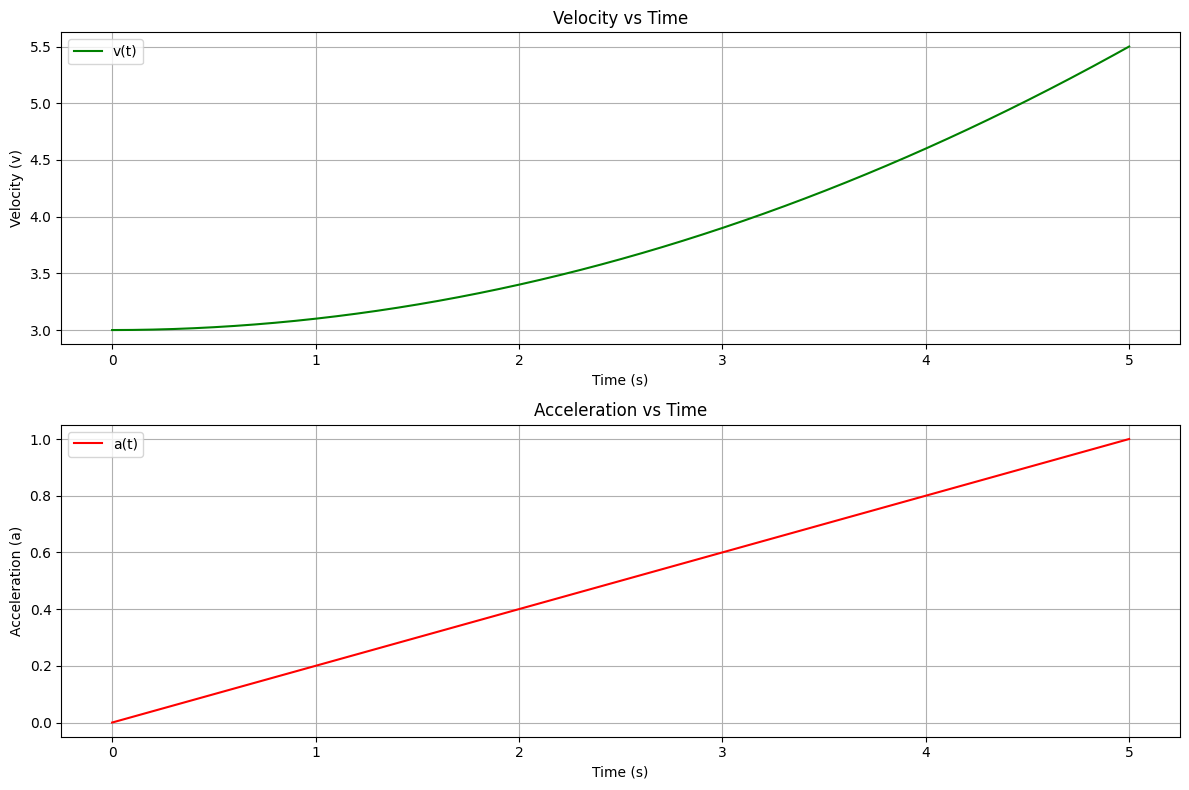

In [10]:
# 2.15
t = sp.symbols('t ')

v = 3 + 0.1 * t**2
a = sp.diff(v, t)
print('(a)', f"{float((a.subs(t,5)-a.subs(t,0))/5):.3g}", 'm/s^2')
print('(b) a_0 = ', f"{float(a.subs(t,0)):.3g}", 'm/s^2, a_5 = ', f"{float(a.subs(t,5)):.3g}", 'm/s^2.')

v_func = sp.lambdify(t, v, 'numpy')
a_func = sp.lambdify(t, a, 'numpy')

t_values = np.linspace(0, 5, 500)
v_values = v_func(t_values)
a_values = a_func(t_values)

plt.figure(figsize=(12,8))

# v(t)
plt.subplot(2, 1, 1)
plt.plot(t_values, v_values, label='v(t)', color='green')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (v)')
plt.title('Velocity vs Time')
plt.legend()
plt.grid(True)

# a(t)
plt.subplot(2, 1, 2)
plt.plot(t_values, a_values, label='a(t)', color='red')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (a)')
plt.title('Acceleration vs Time')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [11]:
# 2.17
t = sp.symbols('t ')

x = 2.17 + 4.80 * t**2 - 0.100 * t**6 # in meter
v = sp.diff(x, t)
a = sp.diff(v, t)

sol = sp.solve(sp.Eq(v, 0), t)
sol = [s.evalf() for s in sol if s.is_real and s.evalf() > 0]
print('(a) When the car has zero velocity, its position is', f"{float(x.subs(t, sol[0])):.3g}", 'm, and its instantaneous a is', f"{float(a.subs(t,sol[0])):.3g}", 'm/s^2.')

# 画图省略

(a) When the car has zero velocity, its position is 15 m, and its instantaneous a is -38.4 m/s^2.


In [12]:
# 2.19
v_0, a = sp.symbols('v_0, a')

eq1 = sp.Eq(v_0 * 6 + 1/2 * a * 6**2, 70)
eq2 = sp.Eq(v_0 + a * 6, 15)
sol = sp.solve([eq1, eq2], (v_0, a))
print('(a) v_0 =', f"{sol[v_0]:.3g}", 'm/s.')
print('(b) a =', f"{sol[a]:.3g}", 's')

(a) v_0 = 8.33 m/s.
(b) a = 1.11 s


In [13]:
# 2.21 A Fast Pitch
a = sp.symbols('a ')

eq = sp.Eq(0-45**2, 2*a*(1.5-0))
sol = sp.solve(eq, a)
print('(a) a =', f"{sol[0]:.3g}", 'm/s^2')
print('(b) t =', f"{(0-45)/sol[0]:.3g}", 's')

(a) a = -675 m/s^2
(b) t = 0.0667 s


In [14]:
# 2.23 Automobile Airbags.
x = sp.symbols('x')
v_0 = (105 * ureg.kilometer / ureg.hour).to(ureg.meter / ureg.second).magnitude
v_t = (0 * ureg.kilometer / ureg.hour).to(ureg.meter / ureg.second).magnitude
a = (-250 * ureg.meter / ureg.second**2).magnitude
eq = sp.Eq(v_t**2 - v_0**2, 2*a*x)
sol = sp.solve(eq, x)
print('The minimum distance is', f"{sol[0]:.3g}", 'meters.')

The minimum distance is 1.70 meters.


In [15]:
# 2.25 Airbag Injuries.
a = 60 * 9.8 * ureg.meter / ureg.second**2
t = 36 * ureg.millisecond
x = (1/2 * a * t**2).to(ureg.meter)
print('It is', f"{x.to(ureg.meter):.2g}.")

It is 0.38 meter.


In [16]:
# 2.27 Are We Martians?
v = 5 * ureg.kilometer / ureg.second
x = 4 * ureg.meter
a = (-v**2 / (2*x)).to(ureg.meter / ureg.second**2)
print('(a) The acceleration is', f"{a:.2g}", ', or', f"{a.magnitude/9.8:.2g}", "g.")
print('(b) It takes', f"{(-v/a).to(ureg.second):.2g}")
print('(c) We cannot. This hypothesis has several possibilities.')

(a) The acceleration is -3.1e+06 meter / second ** 2 , or -3.2e+05 g.
(b) It takes 0.0016 second
(c) We cannot. This hypothesis has several possibilities.


In [17]:
# 2.29
# pass

In [18]:
# 2.31
v_0 = sp.symbols('v_0 ')
a = -9.8
v_1 = 0
h_0 = 0
h_1 = 0.440
eq = sp.Eq(v_1**2 - v_0**2, 2 * a * (h_1 - h_0))
sol = sp.solve(eq, v_0)
sol = [s.evalf() for s in sol if s.evalf() > 0]
print('(a) The initial velocity is', f"{sol[0]:.3g}", 'm/s.')
t = (v_t - sol[0])/a
print('(b) The time it is in air is', f"{t:.3g}", 's.')

(a) The initial velocity is 2.94 m/s.
(b) The time it is in air is 0.300 s.


In [19]:
# 2.33
print('The time is', f"{8.2 / 9.8:.3g}", 's.')

The time is 0.837 s.


In [20]:
# 2.35
a = 9.8 * 0.379
t = 8.5
h = 1/2 * a * t**2
print('(a) The height is', f"{h:.3g}", 'm.')
v = a * t
print('(b) The velocity is', f"{v:.3g}", 'm/s.')
print('(c) Pass.')

(a) The height is 134 m.
(b) The velocity is 31.6 m/s.
(c) Pass.


In [21]:
# 2.37
v_0 = 24
h_0 = 0
a = -9.8
v_1 = v_0 + a * 1
print('(a) When t=1s, v =', f"{v_1:.3g}", 'm/s.')
v_3 = v_0 + a * 3
print('(b) When t=3s, v =', f"{v_3:.3g}", 'm/s.')

(a) When t=1s, v = 14.2 m/s.
(b) When t=3s, v = -5.4 m/s.


In [22]:
# 2.39 A Simple Reaction-Time Test.
t, x = sp.symbols('t x ')
t = sp.sqrt(2*x/9.8)
print('(a) t(x)=Sqrt[2x/g]')
print('(b) The reaction time is', f"{float(t.subs(x,0.176)):.3g}", 's.')

(a) t(x)=Sqrt[2x/g]
(b) The reaction time is 0.19 s.


In [23]:
# 2.41 Launch Failure.
m = 7500 # in kg
h_1 = 525 # in m
a = 2.25 # in m/s^2

v_1 = np.sqrt(2*a*h_1)
t_12 = v_1 / 9.8
h_2 = v_1 * t_12 - 0.5 * 9.8 * t_12**2
print('(a) The maximum height is', f"{h_1+h_2:.3g}", 'm.')

t_23 = np.sqrt(2*(h_1+h_2)/9.8)
v_3 = t_23 * (-9.8)
print('(b) The time is', f"{t_12+t_23:.3g}", 's, and the velocity is', f"{v_3:.3g}", 'm/s.')

print('(c) Pass.')

(a) The maximum height is 646 m.
(b) The time is 16.4 s, and the velocity is -112 m/s.
(c) Pass.


In [24]:
# 2.43
t = 3.60 / 2
h_max = 1/2 * 9.8 * t**2
print('The maximum height is', f"{h_max:.3g}", 'm.')

The maximum height is 15.9 m.


In [25]:
# 2.45
g_1 = 9.8
t_1 = 1.75
t_2 = 18.6
g_2 = g_1 * t_1**2 / t_2**2
print('The acceleration due to gravity on Enceladus is', f"{g_2:.3g}", 'm/s^2.')

The acceleration due to gravity on Enceladus is 0.0868 m/s^2.


In [26]:
# 2.47
h_1 = 1/2 * 9.8 * 3**3
h_2 = 28.0
t = np.sqrt(2*(h_1-h_2)/9.8)
speed = 9.8 * t
print('The speed is', f"{speed:.3g}", 'm/s.')

The speed is 45.2 m/s.


In [27]:
# 2.49
t = sp.symbols('t ')
a = 2.80 * t # in m/s^2
v = sp.integrate(a, t)
x = sp.integrate(v, t)

print('(a) The height is', f"{float(x.subs(t,10)):.3g}", 'm.')

eq = sp.Eq(x, 325)
sol = sp.solve(eq, t)
sol = [s.evalf() for s in sol if s.is_real and s.evalf() > 0 ]
print('(b) The speed is', f"{v.subs(t,sol[0]):.3g}", 'm/s.')

(a) The height is 467 m.
(b) The speed is 110 m/s.


In [28]:
# 2.51
t = sp.symbols('t ')
a = 1.50 * t - 0.120 * t**2
v = sp.integrate(a, t)
x = sp.integrate(v, t)

print('(a)')
print(f"v(t) = {v}")
print(f"x(t) = {x}")

eq = sp.Eq(a, 0)
sol = sp.solve(eq, t)
# print(sol)
print('(b) The maximum velocity is', f"{v.subs(t,sol[1]):.3g}", 'm/s.')


(a)
v(t) = -0.04*t**3 + 0.75*t**2
x(t) = -0.01*t**4 + 0.25*t**3
(b) The maximum velocity is 39.1 m/s.


# Problems

In [29]:
# 2.53
# 题意不完整。

In [30]:
# 2.55 Earthquake Analysis.
p = 6.5 * ureg.kilometer / ureg.second
s = 3.5 * ureg.kilometer / ureg.second
t_2 = 33 * ureg.second
t_1 = ((s * t_2) / (p - s)).to(ureg.second)
t = t_1 + t_2
s = (s * t).to(ureg.kilometer)
print('Is is ', f"{s:.2g}")

Is is  2.5e+02 kilometer


In [31]:
# 2.57
t_1 = 1.15 * ureg.second
t_2 = 4.75 * ureg.second
h_01 = 63 * ureg.meter
h_02 = 1 * ureg.kilometer
h_12 = h_02 - h_01
print('(a) The speed of the 4.75s parts is', f"{(h_12/t_2).to(ureg.kilometer/ureg.second):.3g}")
print('(b) The speed of the first 5.90s parts is', f"{(h_02/(t_1+t_2)).to(ureg.kilometer/ureg.second):.3g}")

(a) The speed of the 4.75s parts is 0.197 kilometer / second
(b) The speed of the first 5.90s parts is 0.169 kilometer / second


In [32]:
# 2.59
v_t, v_0, x_t, x_0, a = sp.symbols('v_t, v_0, x_t, x_0, a')
equation = sp.Eq(v_t**2 - v_0**2, 2 * a * (x_t - x_0))
equation = equation.subs({v_0:0.00, x_0:0.00})

sol_a = sp.solve(equation.subs({v_t:3.00, x_t:8.00}), a)
sol_a = [s.evalf() for s in sol_a if s>0]
sol_v = sp.solve(equation.subs({a:sol_a[0], x_t:16.00}), v_t)
sol_v = [s.evalf() for s in sol_v if s>0]
print('(a) It is', f"{sol_v[0]:.3g}", 'm/s.')

print('(b) It takes', f"{sol_v[0]/sol_a[0]:.3g}", 's.')

(a) It is 4.24 m/s.
(b) It takes 7.54 s.


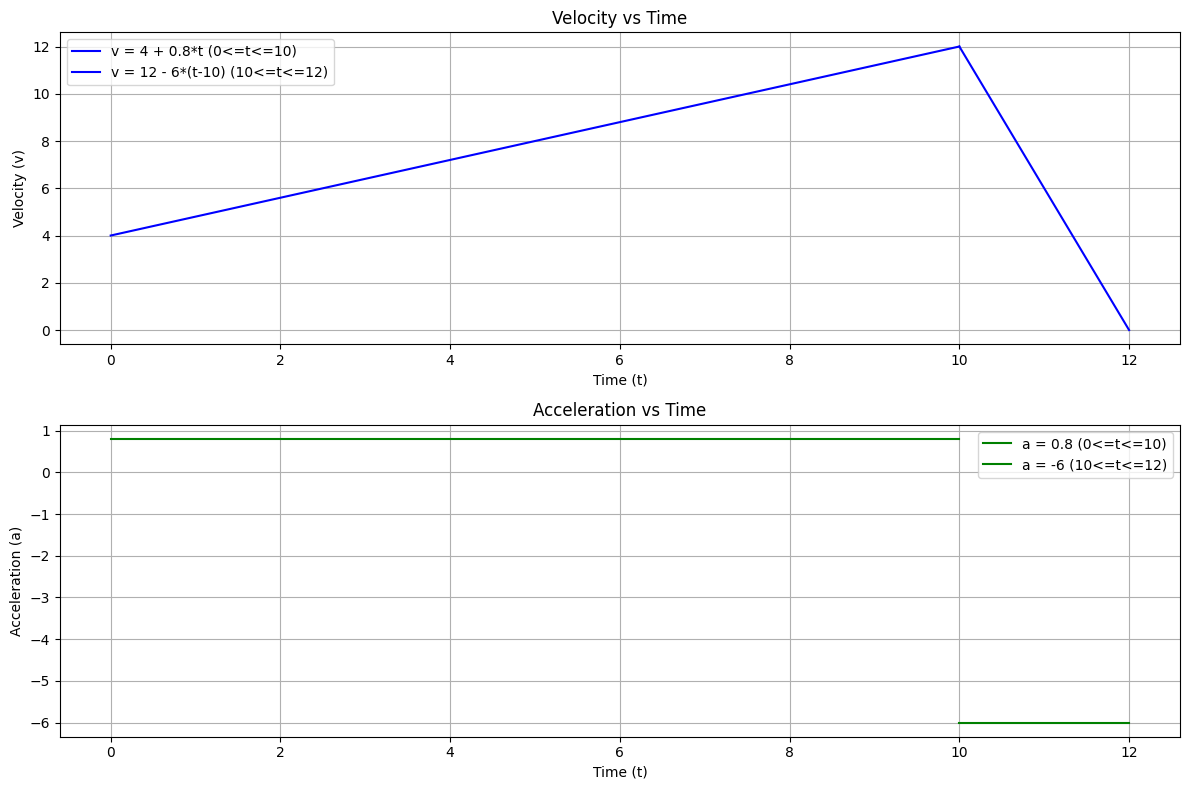

In [33]:
# 2.61
# chatGPT写的
# 定义时间范围
t1 = np.linspace(0, 10, 100)
t2 = np.linspace(10, 12, 20)

# 定义速度函数
v1 = 4 + 0.8 * t1
v2 = 12 - 6 * (t2 - 10)

# 定义加速度函数
a1 = np.full_like(t1, 0.8)  # a = 0.8 for 0<=t<=10
a2 = np.full_like(t2, -6)   # a = -6 for 10<=t<=12

# 创建一个图表，包含两个子图
plt.figure(figsize=(12, 8))

# 绘制第一个子图：速度 vs 时间
plt.subplot(2, 1, 1)
plt.plot(t1, v1, color='blue', label='v = 4 + 0.8*t (0<=t<=10)')
plt.plot(t2, v2, color='blue', label='v = 12 - 6*(t-10) (10<=t<=12)')
plt.xlabel('Time (t)')
plt.ylabel('Velocity (v)')
plt.title('Velocity vs Time')
plt.legend()
plt.grid(True)

# 绘制第二个子图：加速度 vs 时间
plt.subplot(2, 1, 2)
plt.plot(t1, a1, color='green', label='a = 0.8 (0<=t<=10)')
plt.plot(t2, a2, color='green', label='a = -6 (10<=t<=12)')
plt.xlabel('Time (t)')
plt.ylabel('Acceleration (a)')
plt.title('Acceleration vs Time')
plt.legend()
plt.grid(True)

# 调整布局并显示图像
plt.tight_layout()
plt.show()

In [34]:
# 2.63
print('During the first 5.0s of motion, it rolled', f"{200/3:.2g}", 'm.')

During the first 5.0s of motion, it rolled 67 m.


In [35]:
# 2.65
a_car = 3.40 * ureg.meter / ureg.second**2
a_truck = 2.10 * ureg.meter / ureg.second**2
s_overtake = 60 * ureg.meter
t_overtake = (2 * s_overtake / a_truck)**(1/2)
print('(a) The car takes', f"{t_overtake:.3g}", 'to overtake the truck.')

s_behind = (1/2) * a_car * t_overtake**2
print('(b) The car was initially', f"{s_behind:.3g}", 'behind the truck.')

v_car = a_car * t_overtake
v_truck = a_truck * t_overtake
print('(c) The speed of the car and the truck when they are abreast is', f"{v_car:.3g}", ' and' f"{v_truck:.3g}", ', respecitively.')

(a) The car takes 7.56 second to overtake the truck.
(b) The car was initially 97.1 meter behind the truck.
(c) The speed of the car and the truck when they are abreast is 25.7 meter / second  and15.9 meter / second , respecitively.


In [36]:
# 2.67
s = 100 * ureg.meter
t = 12.0 * ureg.second
t_a = 3.00 * ureg.second
a = s / (1/2 * t_a**2 + t_a*(t-t_a))
print('(a) The acceleration is', f"{a:.3g}.")

(a) The acceleration is 3.17 meter / second ** 2.


In [37]:
# 2.69
t = sp.symbols('t ')
v = 8.0 * t - 4.0 * t**2
x = sp.integrate(v, t)
a = sp.diff(v, t)

sol = sp.solve(sp.Eq(x, 0), t)
sol = [s for s in sol if s > 0.0]
print('(a) The object is again at x = 0 m at', f"{sol[0]:.3g}", 's.')

print('(b) The velocity of this object is', f"{v.subs(t, sol[0]):.3g}", 'm/s, and the acceleration is', f"{a.subs(t, sol[0]):.3g}", 'm/s^2.')

(a) The object is again at x = 0 m at 3.00 s.
(b) The velocity of this object is -12.0 m/s, and the acceleration is -16.0 m/s^2.


In [38]:
# 2.71
t, v_0, x_0 = sp.symbols('t v_0 x_0')
a = -2.00 + 3.00 * t
v = sp.integrate(a, t) + v_0
x = sp.integrate(v, t) + x_0

# print(f"v(t) = {v}")
# print(f"x(t) = {x}")

eq = sp.Eq(x.subs(t, 0), x.subs(t, 4))
sol = sp.solve(eq, v_0)
# print(sol)
# print(v.subs({v_0:sol[0], t:4}))
print('(a) The v_0x should be', f"{sol[0]:.3g}", 'm/s.')
print('(b) The velocity at t=4.00 s will be', f"{v.subs({v_0:sol[0], t:4}):.3g}", 'm/s.')

(a) The v_0x should be -4.00 m/s.
(b) The velocity at t=4.00 s will be 12.0 m/s.


In [39]:
# 2.73
h = 30.0 * ureg.meter
g = 9.8 * ureg.meter / ureg.second**2
t = 1.50 * ureg.second
v = (h - 1/2 * g * t**2) / t
h_build = 1/2 * g * (v/g + t)**2
# print(h_build.to(ureg.meter))
print('The height of this building is', f"{h_build:.3g}")

The height of this building is 38.2 meter


In [40]:
# 2.75 Look Out Below.
x = 64.0 * ureg.millimeter
a = 35.0 * ureg.meter / ureg.second**2
t = np.sqrt(2*x/a).to(ureg.second)
print(t)
v = a * t
print('(a) The speed of the shot when Kemal releases it is', f"{v.to(ureg.meter/ureg.second):.3g}")

h_max = 2.2 * ureg.meter + v**2 / (2*9.8 * ureg.meter / ureg.second**2)
print('(b) The maximum height above the ground is', f"{h_max.to(ureg.meter):.3g}")

################################################################################################

0.06047431568147635 second
(a) The speed of the shot when Kemal releases it is 2.12 meter / second
(b) The maximum height above the ground is 2.43 meter


In [41]:
# 2.77
g = 9.8 * ureg.meter / ureg.second**2
t = 10 * ureg.second
v = (t/2 * g)/3
print('(a) The slower stone will take', f"{2*v/g:.2g}")

# 草稿纸算的
print('(b) The faster stone will reach a height of 10H.')

(a) The slower stone will take 3.3 second
(b) The faster stone will reach a height of 10H.


In [42]:
# 2.79
t = sp.symbols('t ')
a = sp.Piecewise((5.0, (t >= 0) & (t <= 10)), (-9.8, (t > 10) & (t <= 30)))
v = sp.integrate(a, t)
x = sp.integrate(v, t)
# print(a)
# print(v)
# print(x)

sol = sp.solve(sp.Eq(v, 0), t)
sol = [s for s in sol if s > 0.0]
print('(a) The maximum height is', f"{x.subs(t, sol[0]):.2g}", 'm.')

a_2 = sp.Piecewise((5.0, (t >= 0) & (t <= 10)), (-9.8, (t > 10) & (t <= 17)), (-2.0, (t > 17) & (t <= 30)))
v_2 = sp.integrate(a_2, t)
x_2 = sp.integrate(v_2, t)
# print(a_2)
# print(v_2)
# print(x_2)

sol_2 = sp.solve(sp.Eq(x, 0))
sol_2 = [s for s in sol_2 if s > 0.0]
print('(b) Powers is', f"{x_2.subs(t, sol_2[0]):.2g}", 'm above the ground when the helicopter crashes.')

(a) The maximum height is 3.8e+2 m.
(b) Powers is 1.8e+2 m above the ground when the helicopter crashes.


In [43]:
# 2.81
t, C = sp.symbols('t C ')
a = -C * t
v = sp.integrate(a, t) + 20
x = sp.integrate(v, t)

sol = sp.solve(sp.Eq(v.subs(t, 8), 0), C)
print('(a) The value of C is', f"{float(sol[0]):.3g}", 'm/s^3.')

print('(b) The object travels', f"{float(x.subs({C:sol[0], t:8.00})):.3g}", 'meters during the 8.00 secondes.')

(a) The value of C is 0.625 m/s^3.
(b) The object travels 107 meters during the 8.00 secondes.


In [44]:
# 2.83
t = sp.symbols('t ')
x_a = 2.60 * t + 1.20 * t**2
v_a = sp.diff(x_a, t)
a_a = sp.diff(v_a, t)

x_b = 2.80 * t**2 - 0.20 * t**3
v_b = sp.diff(x_b, t)
a_b = sp.diff(v_b, t)

print('(a) Car A is ahead.')

eq = sp.Eq(x_a, x_b)
sol = sp.solve(eq, t)
# print(sol)
print('(b) The cars are at the same point at t =', f"{sol[0]:.3g}", 's, t = ', f"{sol[1]:.3g}", 's, t =', f"{sol[2]:.3g}", 's.')

x_a_b = x_b - x_a
v_a_b = sp.diff(x_a_b, t)
a_a_b = sp.diff(v_a_b, t)
# print(x_a_b)
sol_2 = sp.solve(sp.Eq(v_a_b, 0), t)
# print(sol_2)
print('(c) At t =', f"{sol_2[0]:.3g}", 's, t = ', f"{sol_2[1]:.3g}", 's.')

sol_3 = sp.solve(sp.Eq(a_a_b, 0), t)
# print(sol_3)
print('(d) At t =', f"{sol_3[0]:.3g}", 's.')

(a) Car A is ahead.
(b) The cars are at the same point at t = 0.0 s, t =  2.27 s, t = 5.73 s.
(c) At t = 1.00 s, t =  4.33 s.
(d) At t = 2.67 s.


In [45]:
# 2.85
# Pass.

# Challenge Problems

In [47]:
# 2.87
print('The ratio is', f"{(1/np.sqrt(2))/(1-(1/np.sqrt(2))):.2f}")

The ratio is 2.41


In [84]:
# 2.89
t, v, h = sp.symbols('t v h')
g = 9.8
x_1 = v * t - 1/2 * g * t**2
x_2 = -1/2 * g * (t-1)**2
sol_t = sp.solve(sp.Eq(x_2, -20), t)
sol_t = [s for s in sol_t if s.evalf() > 0]
# print(sol_t)
sol_v = sp.solve(sp.Eq(x_1.subs(t, sol_t[0]), -20), v)
# print(sol_v)
print('(a1) The initial speed of the first ball must be', f"{sol_v[0]:.3g}", 'm/s')

sol_t = sp.solve(sp.Eq(x_1, x_2), t)
# print(sol_t)
h = -x_2.subs(t, sol_t[0])
print('(a2) The height of the buiding is', sp.simplify(h), 'm.')

print('(b)(i) The height of the building must be', f"{h.subs(v, 6):.3g}", 'meters.')
print('(b)(ii) The height of the building must be', f"{h.subs(v, 9.5):.3g}", 'meters.')
# print('(b)(iii) The height of the building must be', f"{h.subs(v, 9.8):.3g}", 'meters.')

print('(c) v max = 9.8 m/s.')

print('(d) v min = 4.9 m/s.')

(a1) The initial speed of the first ball must be 8.18 m/s
(a2) The height of the buiding is 1.225*(0.204081632653061*v - 1)**2/(0.102040816326531*v - 1)**2 m.
(b)(i) The height of the building must be 0.411 meters.
(b)(ii) The height of the building must be 1.15e+3 meters.
(c) v max = 9.8 m/s.
(d) v min = 4.9 m/s.


In [86]:
# 2.91
print('(b) d_a/sqrt(2).')

(b) d_a/sqrt(2).
